**Лабораторная работа №2: Визуализация данных**

**Выполнила: Мишагина Валерия 6133**



Датасет -  [2024 TMDB Latest Movie Data  ](https://www.kaggle.com/datasets/hafiznouman786/2024-tmdb-latest-movie-data?resource=download)

**№1.** Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [ ]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('movies2.csv')

**№2.** Привести описание датасета.

Описание столбцов датасета [2024 TMDB Latest Movie Data  ](https://www.kaggle.com/datasets/hafiznouman786/2024-tmdb-latest-movie-data?resource=download)

* movie_id: Unique identifier for each movie.
* title: Title of the movie.
* release_date: Release date of the movie.
* genre: Genre(s) of the movie.
* overview: Brief summary or synopsis of the movie.
* popularity: Popularity score of the movie.
* vote_average: Average rating of the movie.
* vote_count: Number of votes the movie has received.



In [ ]:
# информация о данных в DataFrame, тип данных признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9400 non-null   int64  
 1   original_title  9400 non-null   object 
 2   overview        9399 non-null   object 
 3   release_date    9400 non-null   object 
 4   popularity      9400 non-null   float64
 5   vote_average    9400 non-null   float64
 6   vote_count      9400 non-null   int64  
 7   genre_names     9400 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 587.6+ KB


In [ ]:
# размерность датасета
data.shape

(9400, 8)

In [ ]:
bins = [0, 4, 7, 10]
labels = ['low', 'medium', 'high']
data['rating'] = pd.cut(data['vote_average'], bins=bins, labels=labels)

In [ ]:
# загрубим значение даты выхода для группировке по годам
data['release_year'] = data["release_date"].apply(lambda e:  str(round(int(e[0:4]), -1)) + '-e')

In [ ]:
data['release_year_full'] = data["release_date"].apply(lambda e:  str((int(e[0:4]))) + '-e')

In [ ]:
#загрубим значения датасета. Выделим среди жанров фильма "главный"
data = data[data['genre_names'] != '[]']
data['main_genre'] = data["genre_names"].apply(lambda e: e.split('\'')[1])

<ipython-input-11-76eda0bdf38b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['main_genre'] = data["genre_names"].apply(lambda e: e.split('\'')[1])


# matplotlib

**№3.1.** Построить несколько графиков разного вида с использованием `matplotlib`

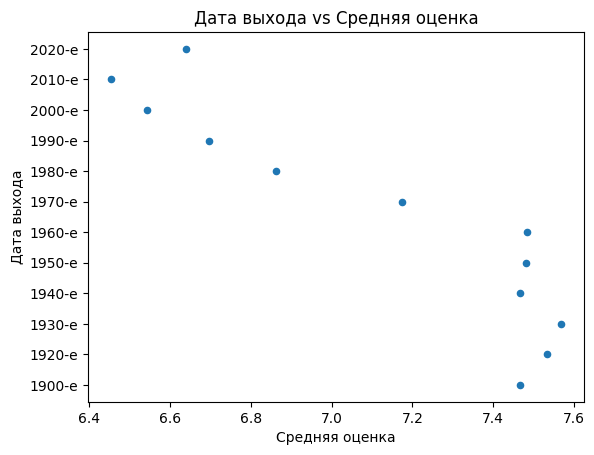

In [ ]:
grouped = data.groupby(['release_year'], as_index=False)['vote_average'].mean()
grouped.plot.scatter(x='vote_average', y='release_year')
plt.xlabel('Средняя оценка')
plt.ylabel('Дата выхода')
plt.title('Дата выхода vs Средняя оценка')
plt.show()

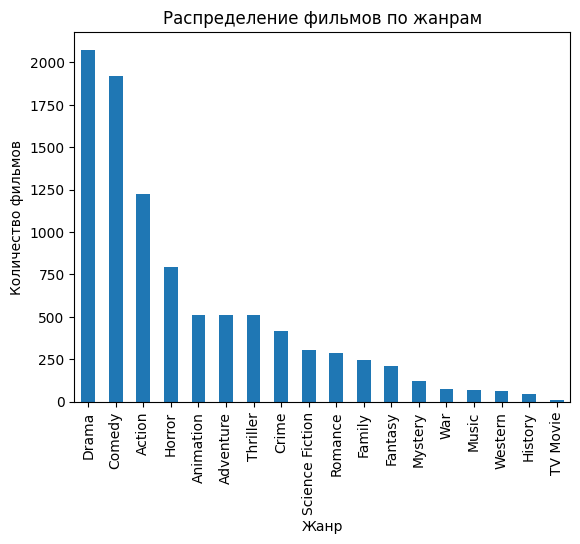

In [ ]:
data['main_genre'].value_counts().plot.bar()
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по жанрам')
plt.show()

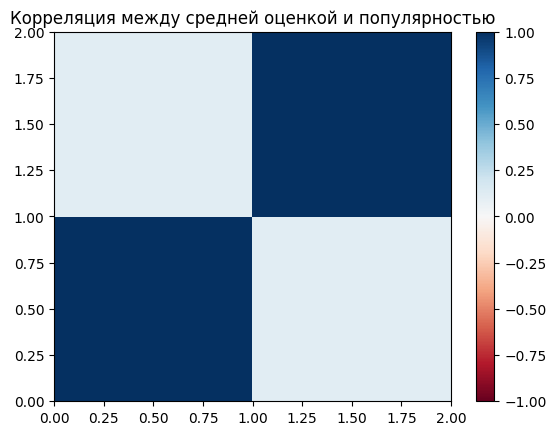

In [ ]:
correlation_matrix = data[['vote_average', 'popularity']].corr()
fig, ax = plt.subplots()
heatmap = ax.pcolor(correlation_matrix, vmin=-1, vmax=1, cmap='RdBu')
plt.title('Корреляция между средней оценкой и популярностью')
plt.colorbar(heatmap)
plt.show()

**№3.2.** Построить несколько суб-графиков на одном графике используя `.subplot`



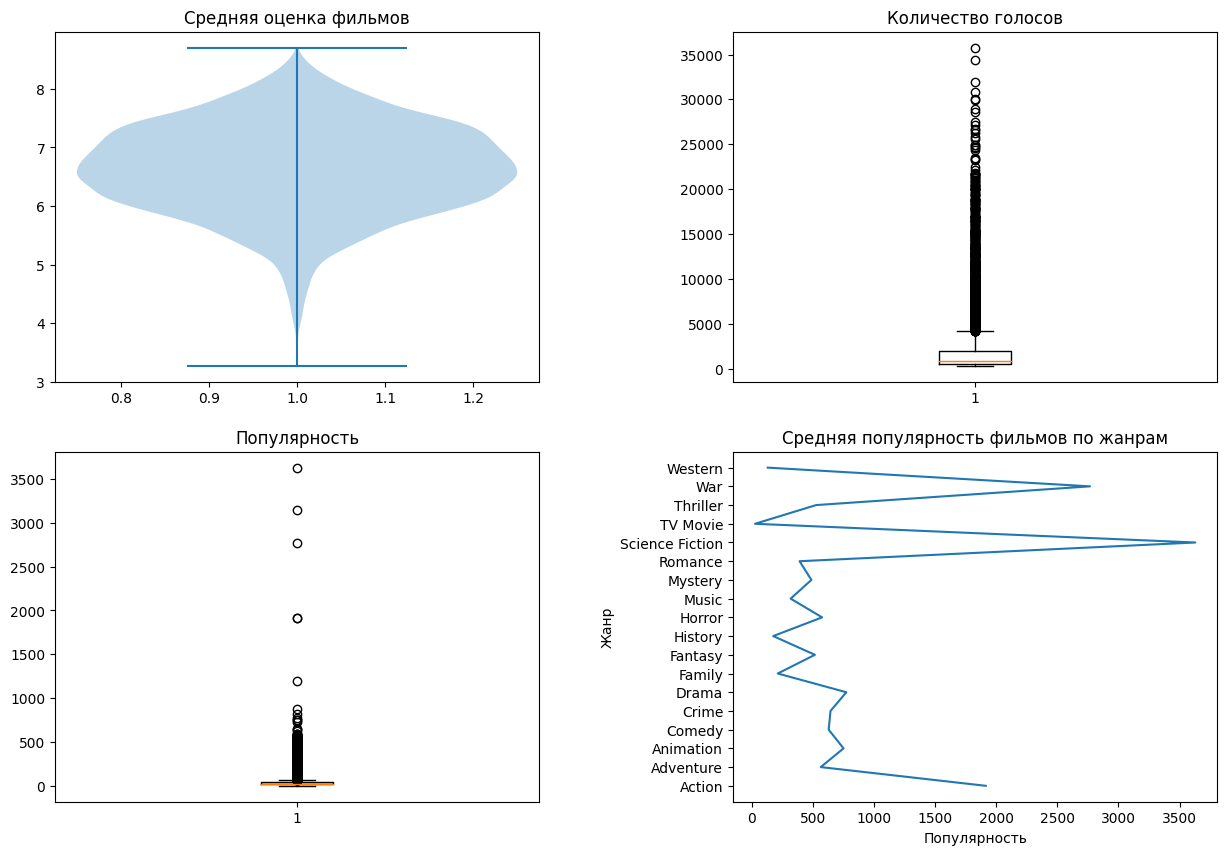

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.2)

grouped = data.groupby(['main_genre'], as_index=False)['popularity'].max()
plt.plot(grouped['popularity'], grouped['main_genre'])
plt.title('Средняя популярность фильмов по жанрам')
plt.xlabel('Популярность')
plt.ylabel('Жанр')

ax[0,0].violinplot(data['vote_average'])
ax[0,0].set(title ='Средняя оценка фильмов')

ax[0,1].boxplot(data['vote_count'])
ax[0,1].set(title ='Количество голосов')

ax[1,0].boxplot(data['popularity'])
ax[1,0].set(title ='Популярность')

plt.show()

**№3.3.** Построить интерактивный график со слайдером

Для начала выберем самые часто встречающееся в датасете жанры фильмов для их отражения на графике

In [110]:
types = data["main_genre"].value_counts().head(5).keys()

In [242]:
types

Index(['Drama', 'Comedy', 'Action', 'Horror', 'Animation'], dtype='object', name='main_genre')

Округлим популярность до десятков

In [152]:
data['popularity'] = data["popularity"].apply(lambda e:  round(int(e), -1))

In [179]:
grouped = data.groupby(['main_genre', 'popularity'])['vote_average'].mean().reset_index()

In [180]:
grouped

,main_genre,popularity,vote_average
0,Action,0,6.579125
1,Action,10,6.479864
2,Action,20,6.322819
3,Action,30,6.282912
4,Action,40,6.404927
...,...,...,...
437,Western,60,7.917000
438,Western,70,7.792333
439,Western,80,7.824000
440,Western,120,7.256000


In [128]:
pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


In [130]:
from google.colab import output
output.enable_custom_widget_manager()

0

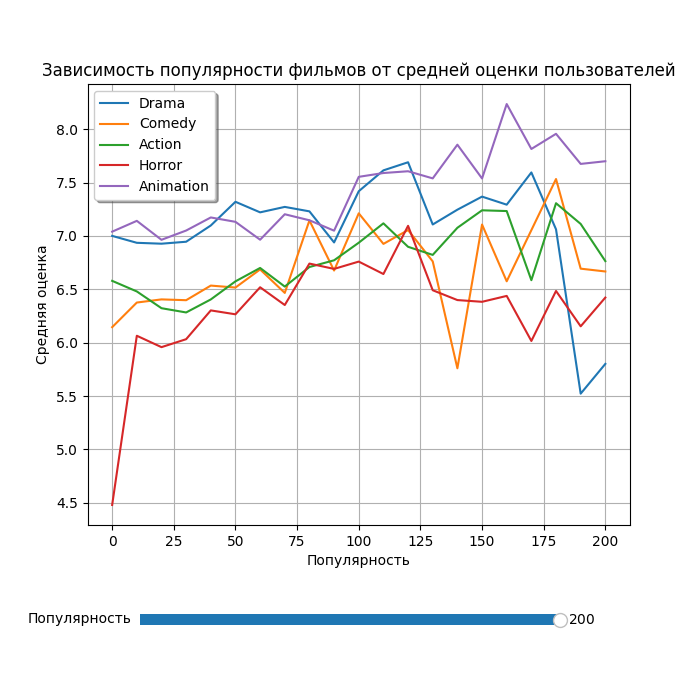

In [160]:
%matplotlib inline
%matplotlib widget
from matplotlib.widgets import Slider

f, ax = plt.subplots(figsize=(7, 7))

for i in range(types.shape[0]):
    plot_grouped = grouped[(grouped['main_genre'] == types[i]) & (grouped['popularity'] <= 200)]
    ax.plot(plot_grouped['popularity'], plot_grouped['vote_average'], label=types[i])

plt.title('Зависимость популярности фильмов от средней оценки пользователей')
plt.xlabel('Популярность')
plt.ylabel('Средняя оценка')
plt.grid()

leg = ax.legend(loc ='upper left', fancybox=True, shadow=True)

f.subplots_adjust(bottom=0.25)

ax_popularity= f.add_axes([0.20, 0.1, 0.60, 0.03])
popularity_slider = Slider(
    ax=ax_popularity,
    label='Популярность',
    valmin=0,
    valmax=200,
    valinit=200,
    valstep = 10,
)

lines = ax.get_lines()
lined = {}
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(7)
    lined[legline] = origline

def update(val):
    ax.clear()
    popularity = popularity_slider.val
    for i in range(types.shape[0]):
        plot_grouped= grouped[(grouped['main_genre'] == types[i]) & (grouped['popularity'] <= popularity)]
        ax.plot(plot_grouped['popularity'], plot_grouped['vote_average'], label=types[i])
    leg = ax.legend(loc ='upper left', fancybox=True, shadow=True)
    ax.set_xlabel('Зависимость популярности фильмов от средней оценки пользователей')
    ax.set_ylabel('Популярность')
    ax.set_title('Средняя оценка')
    ax.grid()

    lines = ax.get_lines()
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(7)
        lined[legline] = origline

    f.canvas.draw_idle()

def on_pick(event):
    legline = event.artist
    origline = lined[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    legline.set_alpha(1.0 if visible else 0.2)
    f.canvas.draw()

f.canvas.mpl_connect('pick_event', on_pick)
popularity_slider.on_changed(update)

# Pandas

**№4.** Построить три разных вида графиков с использованием pandas.`DataFrame.plot `/ `Series.plot`

через методы Series

<Axes: ylabel='count'>

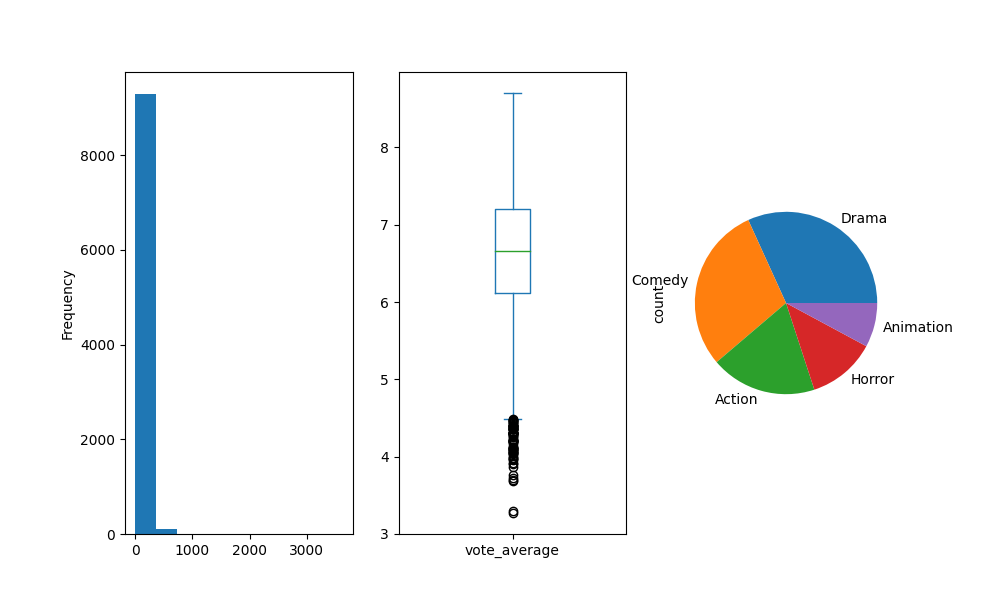

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6))

data['popularity'].plot(kind='hist', ax=ax1)
data['vote_average'].plot(kind='box', ax=ax2)
data["main_genre"].value_counts().head(5).plot(kind='pie', ax=ax3)

 через методы DataFrame

<Axes: title={'center': 'vote_average'}, xlabel='main_genre'>

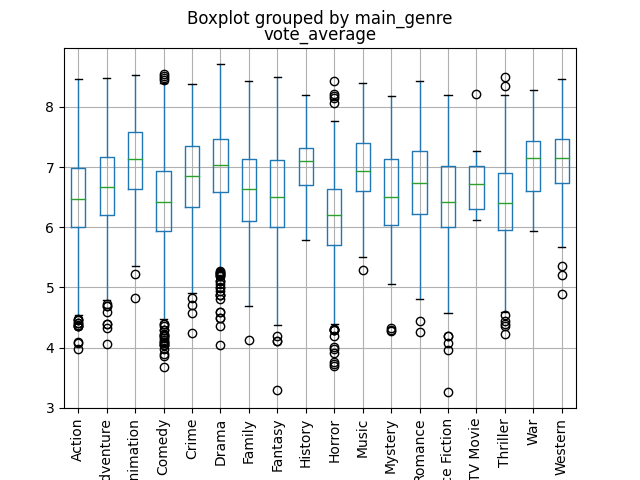

In [175]:
data.boxplot(by='main_genre', column='vote_average', rot=90)

array([[<Axes: title={'center': 'Action'}>,
        <Axes: title={'center': 'Adventure'}>,
        <Axes: title={'center': 'Animation'}>,
        <Axes: title={'center': 'Comedy'}>],
       [<Axes: title={'center': 'Crime'}>,
        <Axes: title={'center': 'Drama'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'Fantasy'}>],
       [<Axes: title={'center': 'History'}>,
        <Axes: title={'center': 'Horror'}>,
        <Axes: title={'center': 'Music'}>,
        <Axes: title={'center': 'Mystery'}>],
       [<Axes: title={'center': 'Romance'}>,
        <Axes: title={'center': 'Science Fiction'}>,
        <Axes: title={'center': 'TV Movie'}>,
        <Axes: title={'center': 'Thriller'}>],
       [<Axes: title={'center': 'War'}>,
        <Axes: title={'center': 'Western'}>, <Axes: >, <Axes: >]],
      dtype=object)

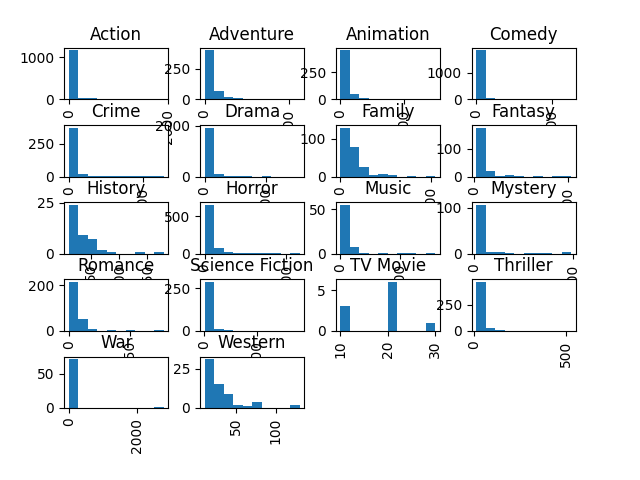

In [185]:
data.hist(column='popularity', by=['main_genre'])

# seaborn

In [187]:
import seaborn as sns
num_col = ['popularity', 'vote_average', 'vote_count']

**№5.1.** Построить `.pairplot` на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков

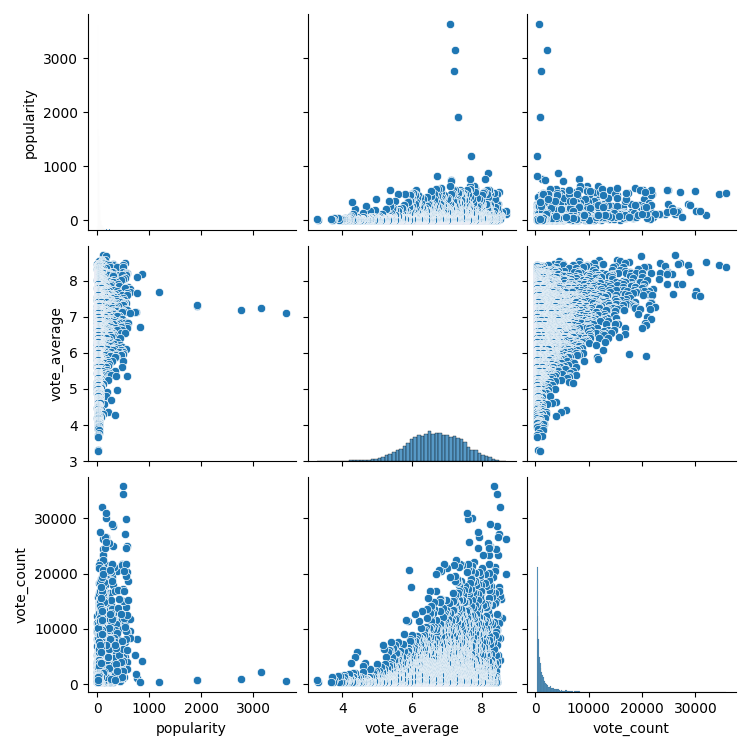

In [216]:
sns.pairplot(data[num_col])

**№5.2.** Построить` .jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков.

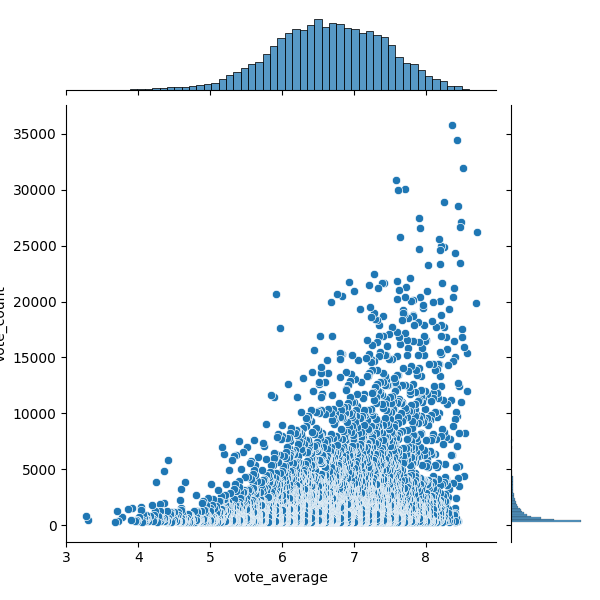

In [219]:
sns.jointplot(data=data, x='vote_average', y='vote_count')

**№5.3.** Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

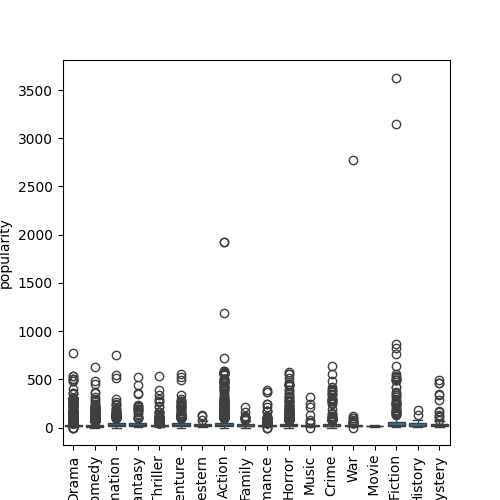

In [224]:
fig_sns, ax_sns = plt.subplots(figsize=(5, 5))
sns.boxplot(ax = ax_sns, data=data, x='main_genre', y='popularity');
for tick in ax_sns.get_xticklabels():
    tick.set_rotation(90)

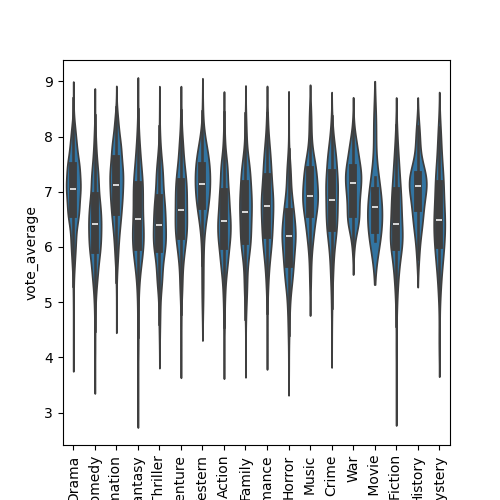

In [229]:
fig_sns, ax_sns = plt.subplots(figsize=(5, 5))
sns.violinplot(ax = ax_sns, data=data, x='main_genre', y='vote_average');
for tick in ax_sns.get_xticklabels():
    tick.set_rotation(90)

**№5.4.** Построить график `.heatmap `попарной корреляции всех числовых признаков.

<Axes: >

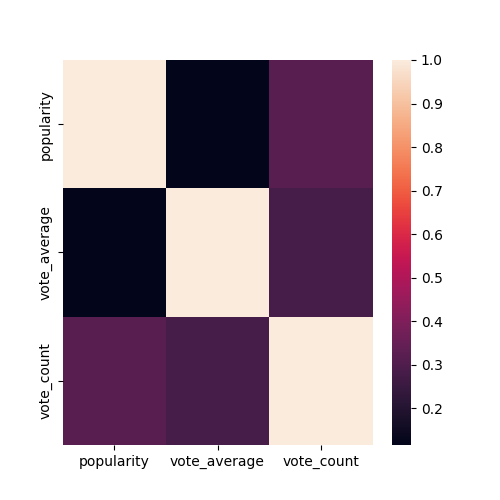

In [230]:
fig_sns, ax_sns = plt.subplots(figsize=(5, 5))
sns.heatmap(data=data[num_col].corr())

# scipy.stats

**№6.1.** Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

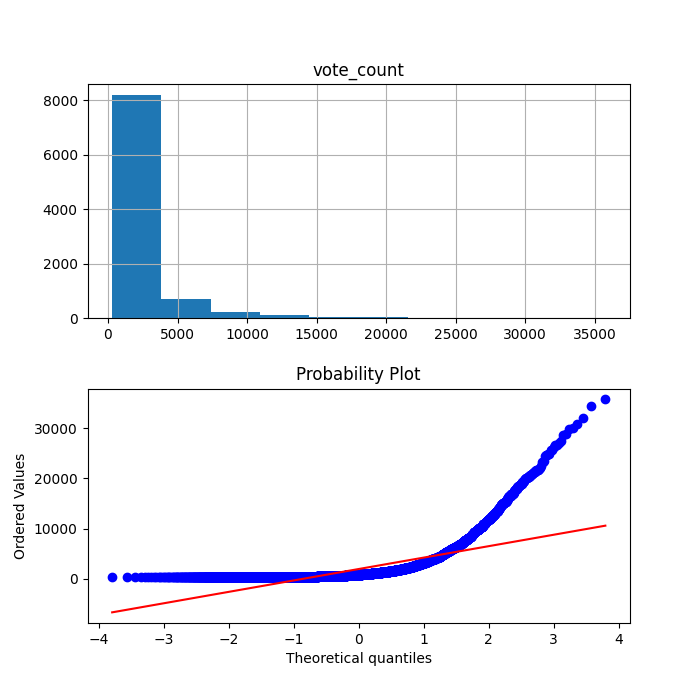

In [231]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(7, 7))
stats.probplot(data['vote_count'], dist="norm", plot=plt)
plt.subplot(2, 1, 2)
data.hist(ax=ax_p[0], column='vote_count')
plt.show()

# plotly

In [249]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs.scatter import Line
init_notebook_mode(connected=True)

**№7.1.** Построить несколько графиков разного вида

In [238]:
grouped = data.groupby(['release_year'], as_index=False)['vote_average'].mean()
fig = px.scatter(data, 'vote_average', 'release_year')
fig.show()

In [241]:
fig = px.line(data, 'vote_average', 'popularity')
fig.show()

In [237]:
fig = px.histogram(data, x="release_year", y='vote_average')
fig.show()

**№7.2.** Построить несколько суб-графиков на одном графике.

In [252]:
grouped = data.groupby(['main_genre', 'popularity'])['vote_average'].mean().reset_index()
fig = make_subplots(rows=4, cols=1, subplot_titles=types)

for i in range(4):
        grouped1 = grouped[grouped['main_genre'] == types[i]]
        fig.add_trace(go.Scatter(x=grouped1['popularity'], y=grouped1['vote_average']), row=i+1, col=1)

fig.show()

**№7.3.** Построить интерактивный график

In [246]:
fig = go.Figure()

for i in range(types.shape[0]):
    grouped1 = grouped[grouped['main_genre'] == types[i]]
    fig.add_trace(go.Scatter(x=grouped1['popularity'], y=grouped1['vote_average'], name = types[i]))

fig.update_layout(
    title_text='Зависимость популярности фильмов от средней оценки пользователей',
    title_x=0.5,
    legend_title='Жанр',
    legend = dict(orientation = "v", y = .5, x = 1.025)
)

fig.update_layout(
    xaxis = dict(
        rangeslider = dict(
            visible = True
        ),
        type = 'linear'
    ),
    autosize=False,
    width=1300,
    height=800,
)

fig.show()